# K-means Clustering PCA

In [1]:
# Miscellaneous operating system interfaces
import os

# A compendium of commonly-used regular expressions.
import re

# JSON encoder and decoder
import json

# Unix style pathname pattern expansion
from glob import glob

# Basic date and time types
from datetime import date, datetime, timedelta

# Set the absolute directory path.
BASE_PATH = os.path.abspath('')
dirs = os.path.dirname(BASE_PATH)
CONFIG_PATH = os.path.join(dirs, 'configs')
DATASET_PATH = os.path.join(dirs, 'datasets')
MIDDLEWARE_PATH = os.path.join(dirs, 'middlewares')
ML_PATH = os.path.join(dirs, 'mls')
MODEL_PATH = os.path.join(dirs, 'models')
ROUTE_PATH = os.path.join(dirs, 'routes')
TEMPLATE_PATH = os.path.join(dirs, 'templates')

In [2]:
# The implementation of import
import importlib

# A Fast, Extensible Progress Bar for Python and CLI
from tqdm import tqdm

In [3]:
# The fundamental package for scientific computing with Python.
import numpy as np

# Flexible and powerful data analysis / manipulation library for Python, providing labeled data structures similar to R data.frame objects, statistical functions, and much more
import pandas as pd

# Python tools for geographic data
import geopandas as gpd

In [4]:
# Statistical data visualization using matplotlib.
import seaborn as sns

# matplotlib: plotting with Python.
import matplotlib as mpl
import matplotlib.pyplot as plt
# import matplotlib.font_manager

# Set the matplotlib color cycle using a seaborn palette.
sns.set_palette('pastel')

# plot outputs appear and be stored within the notebook.
%matplotlib inline

# A module for finding, managing, and using fonts across platforms.
#mpl.font_manager._rebuild()
#sorted([f.name for f in mpl.font_manager.fontManager.ttflist if f.name.startswith('Malgun')])

if sys.platform.startswith('darwin'):
    mpl.rc('font', family='AppleGothic')
elif sys.platform.startswith('win32'):
    mpl.rc('font', family='Malgun Gothic')

mpl.rc('axes', unicode_minus=False)

In [5]:
# Machine learning in Python
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Computing with Python functions.
import joblib
#joblib.dump(lr, './models/model.pkl')
#model = joblib.load('./models/model.pkl')

In [6]:
# f = request.files.get('kmeans__file')
f = os.path.join(DATASET_PATH, 'sklearn', 'iris_train.csv')
raw = pd.read_csv(f)

In [7]:
raw.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.3,1.7,0.5,0
1,6.1,3.0,4.9,1.8,2
2,5.1,3.4,1.5,0.2,0
3,5.1,3.5,1.4,0.3,0
4,5.2,3.4,1.4,0.2,0


In [8]:
raw.drop('target', axis=1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.3,1.7,0.5
1,6.1,3.0,4.9,1.8
2,5.1,3.4,1.5,0.2
3,5.1,3.5,1.4,0.3
4,5.2,3.4,1.4,0.2
...,...,...,...,...
107,4.7,3.2,1.3,0.2
108,6.2,2.8,4.8,1.8
109,6.7,3.1,4.4,1.4
110,5.6,2.9,3.6,1.3


In [9]:
# Preprocessing
# StandardScaler: Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
# scaled = scaler.fit_transform(raw.iloc[:, :-1])
# scaled = scaler.fit_transform(raw[raw.columns.drop('target')])
scaled = scaler.fit_transform(raw.drop('target', axis=1))

In [10]:
# Decomposition
# PCA: Principal Component Analysis
data = PCA(n_components=2).fit_transform(scaled)
df = pd.DataFrame(data, columns=['pca_x', 'pca_y'])
df['target'] = raw['target']

In [11]:
# Cluster: K-Means Clustering
# n_clusters = request.form.get('kmeans__n_clusters')
n_clusters = 3
model = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, random_state=2021)
model.fit(scaled)
df['cluster'] = model.labels_

In [14]:
df.head()

,pca_x,pca_y,target,cluster
0,-1.838367,-0.032481,0,1
1,0.946311,-0.022696,2,2
2,-2.180928,-0.209849,0,1
3,-2.198243,-0.417078,0,1
4,-2.151253,-0.254904,0,1


Text(0, 0.5, 'PCA Y')

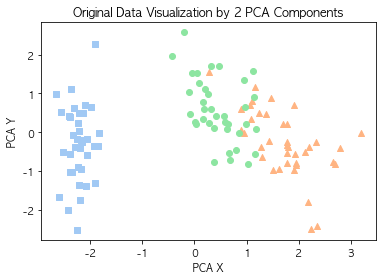

In [21]:
# Plots
markers = ['s', 'o', '^', 'P', 'D', 'H', 'x', ',', '+', '.', 'o', '*']

# Original Data
plt.figure()
try:
    for v in df.target.unique():
        x_axis = df.query("target == @v")['pca_x']
        y_axis = df.query("target == @v")['pca_y']
        plt.scatter(x_axis, y_axis, marker=markers[v])
except Exception as e:
    print(e)

plt.title('Original Data Visualization by 2 PCA Components')
plt.xlabel('PCA X')
plt.ylabel('PCA Y')

Text(0, 0.5, 'PCA Y')

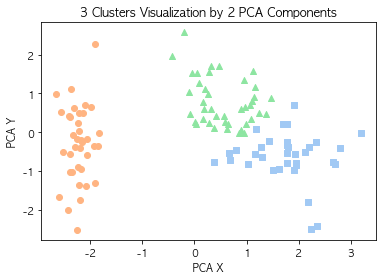

In [13]:
# Cluster Data
plt.figure()

try:
    for i in np.arange(n_clusters):    
        x_axis = df.query("cluster == @i")['pca_x']
        y_axis = df.query("cluster == @i")['pca_y']
        
        plt.scatter(x_axis, y_axis, marker=markers[i])
except Exception as e:
    print(e)

plt.title('{} Clusters Visualization by 2 PCA Components'.format(n_clusters))
plt.xlabel('PCA X')
plt.ylabel('PCA Y')